In [ ]:
import os
from imutils import paths
import argparse

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D,Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Data'

In [ ]:
#I initialize learning rate, epoch, and batch size
Initial_LR = 1e-5
epoch = 60
BS = 1

In [ ]:
#its an dictionary with key=dataset and value=dataset
args = {}
args['dataset'] = dataset

In [ ]:
args

{'dataset': '/content/drive/MyDrive/Data'}

In [ ]:
#conver image into array form so model can understand each image value
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))

data = []
labels = []

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
    
data = np.array(data)/255.0
labels = np.array(labels)

In [ ]:
data

array([[[[0.        , 0.00392157, 0.00784314],
         [0.        , 0.00784314, 0.        ],
         [0.00392157, 0.        , 0.        ],
         ...,
         [0.78039216, 0.78039216, 0.78039216],
         [0.75686275, 0.75686275, 0.75686275],
         [0.79607843, 0.79607843, 0.79607843]],

        [[0.        , 0.        , 0.        ],
         [0.00392157, 0.02352941, 0.        ],
         [0.        , 0.01568627, 0.00392157],
         ...,
         [0.81176471, 0.81176471, 0.81176471],
         [0.80392157, 0.80392157, 0.80392157],
         [0.8       , 0.8       , 0.8       ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.85882353, 0.85882353, 0.85882353],
         [0.85882353, 0.85882353, 0.85882353],
         [0.83921569, 0.83921569, 0.83921569]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [ ]:
#convert labels into 0 and 1
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
(X_train,X_test,Y_train,Y_test) = train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=42)

In [ ]:
X_train.shape

(160, 224, 224, 3)

In [ ]:
train_Aug = ImageDataGenerator(rotation_range=15,
                              fill_mode='nearest')

In [ ]:
#implement transfer learning VGG16 model
bmodel = VGG16(weights='imagenet',include_top = False, input_tensor=Input(shape=(224,224,3)))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
bmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
hmodel = bmodel.output
hmodel = AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel = Flatten(name="flatten")(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = tf.keras.layers.Dropout(0.5)(hmodel)
hmodel = Dense(2, activation ='softmax')(hmodel)

model = Model(bmodel.input,hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


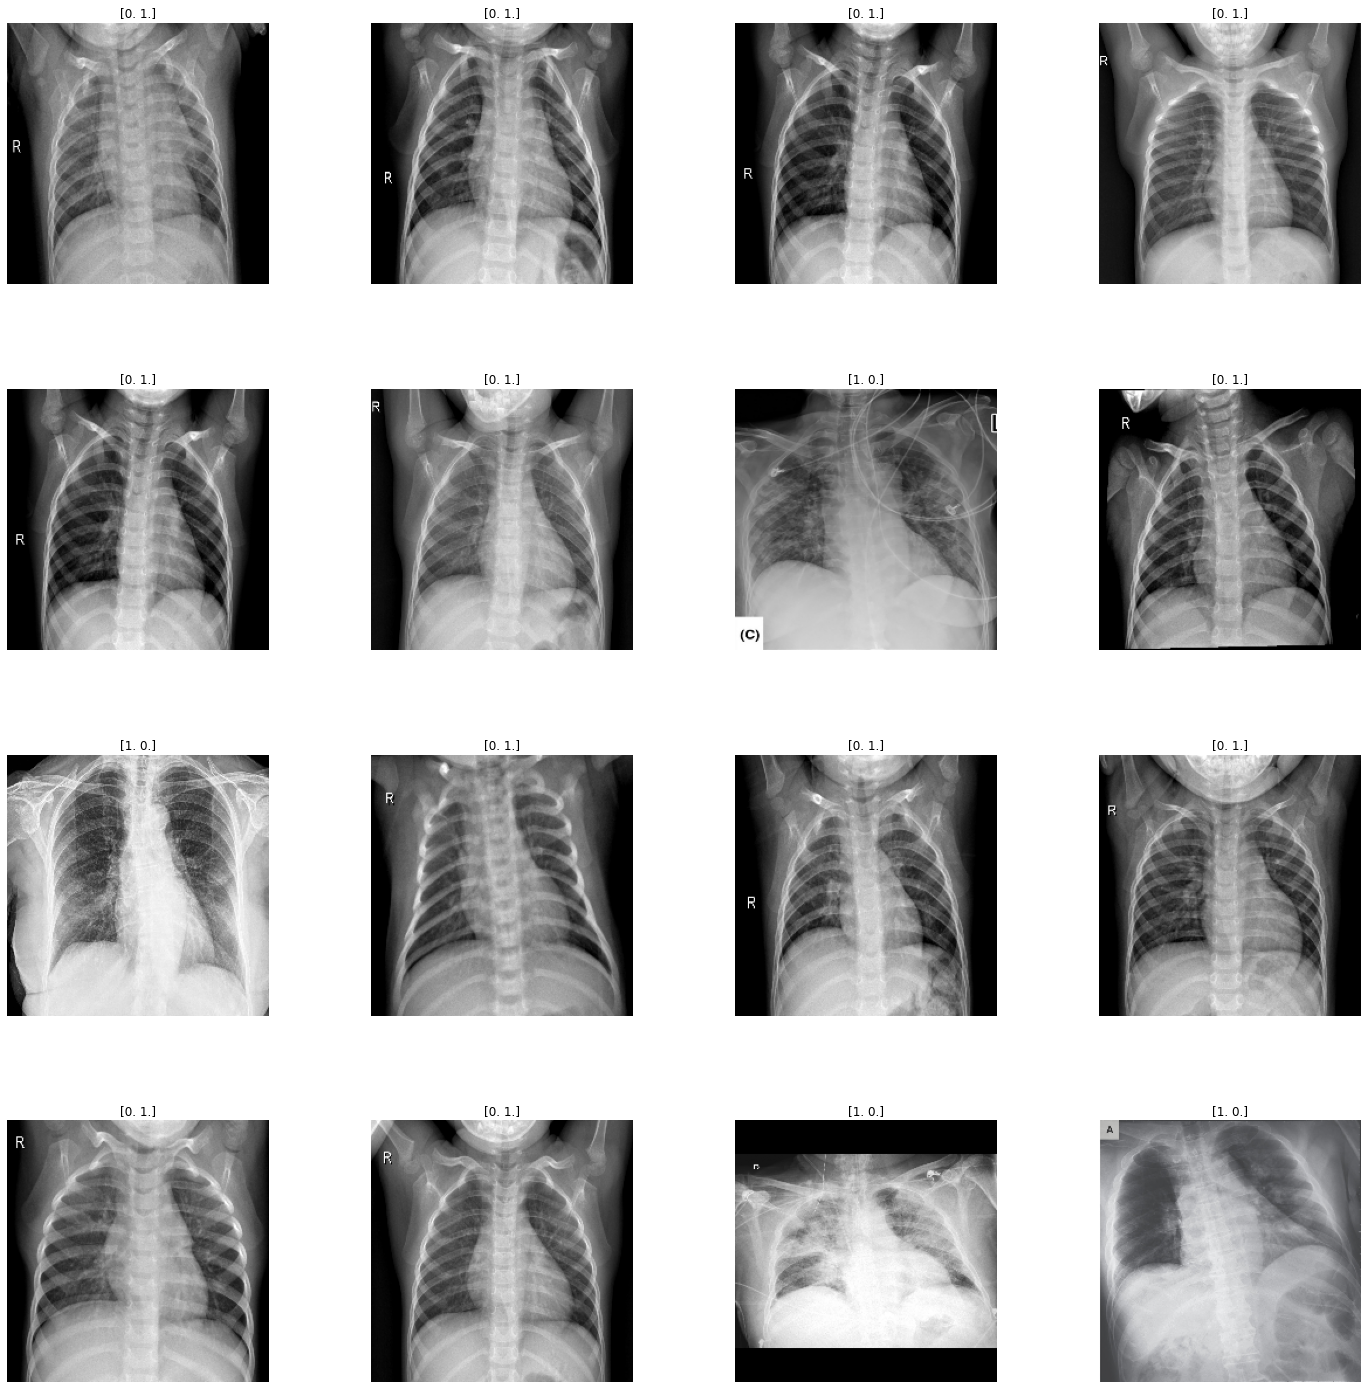

In [ ]:
import matplotlib.pyplot as plt
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
opt = Adam(lr=Initial_LR, decay=Initial_LR/epoch)
model.compile(loss="binary_crossentropy",optimizer = opt,metrics=["accuracy"])

In [ ]:
R = model.fit_generator(
    train_Aug.flow(X_train,Y_train,batch_size=BS),
    steps_per_epoch = len(X_train) // BS,
    validation_data = (X_test,Y_test),
    validation_steps = len(X_test) // BS,
    epochs = epoch
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
160/160 [==============================] - 4s 17ms/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 2/60
160/160 [==============================] - 3s 16ms/step - loss: 0.0565 - accuracy: 0.9871 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 3/60
160/160 [==============================] - 3s 16ms/step - loss: 0.0295 - accuracy: 0.9979 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 4/60
160/160 [==============================] - 3s 16ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 5/60
160/160 [==============================] - 3s 16ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 6/60
160/160 [==============================] - 3s 16ms/step - loss: 0.0288 - accuracy: 0.9969 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 7/60
160/160 [==============================] - 3s 16ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 1.0000

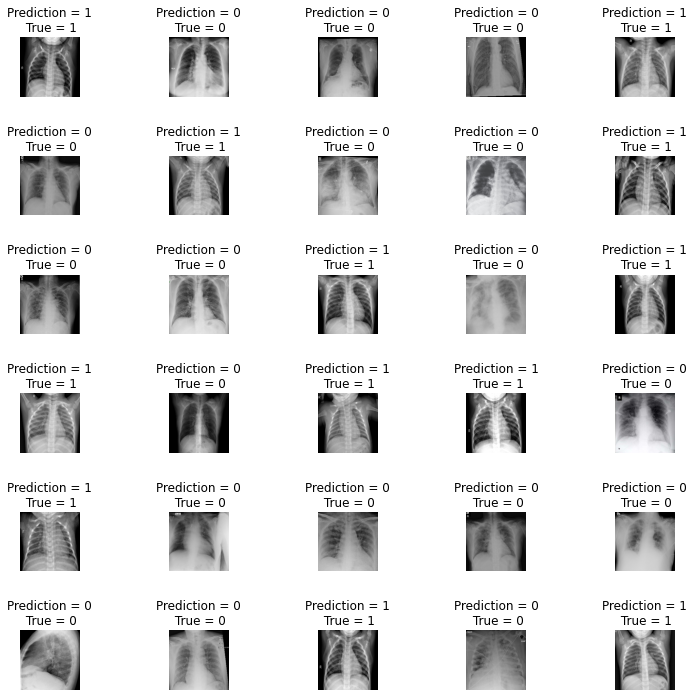

In [ ]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


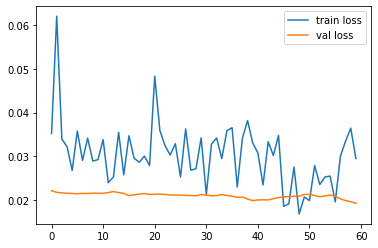

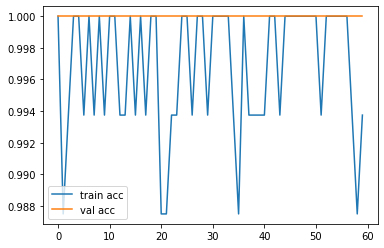

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('Covid_model.h5')


Prediction: Corona


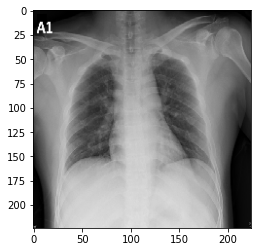

In [ ]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/drive/MyDrive/Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')


Prediction: Normal


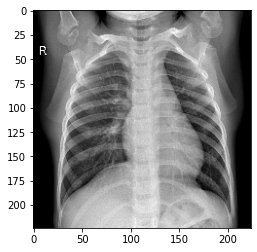

In [ ]:
img = image.load_img('/content/drive/MyDrive/Data/Normal/IM-0166-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')